## Assignment 3
#### Anna Chen (yc4406)

### Part 1: Creating and Manipulating Arrays

In [173]:
import pandas as pd

In [4]:
import numpy as np

In [35]:
import matplotlib as mp

In [214]:
from matplotlib import pyplot as plt
from matplotlib import colormaps

### 1.1. Create two 2D arrays representing coordinates x, y on the cartesian plan

In [174]:
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)
xx,yy = np.meshgrid(x,y)

### 1.2. Visualize each 2D array using pcolormesh

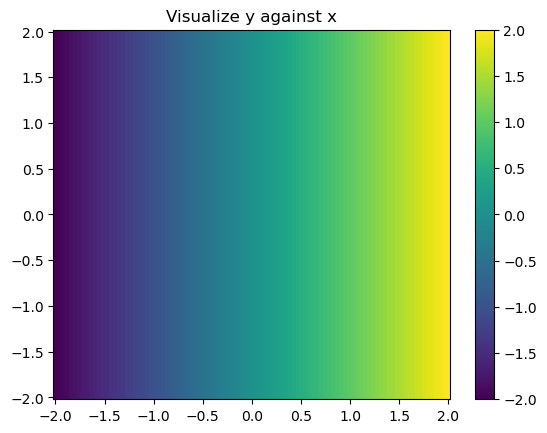

In [175]:
plt.pcolormesh(x,y,xx)
plt.title("Visualize y against x")
plt.colorbar()

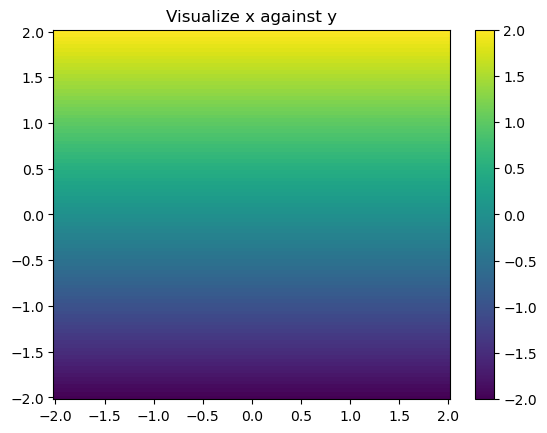

In [176]:
plt.pcolormesh(y,x,yy)
plt.title("Visualize x against y")
plt.colorbar()

### 1.3 From your cartesian coordinates, create polar coordinates

In [177]:
r = (xx**2+yy**2)**(1/2)
phi = np.arctan2(yy,xx)

### 1.4 Visualize polar coordinates on the 2D x/y plane

Text(0.5, 1.0, 'r on the x-y plane')

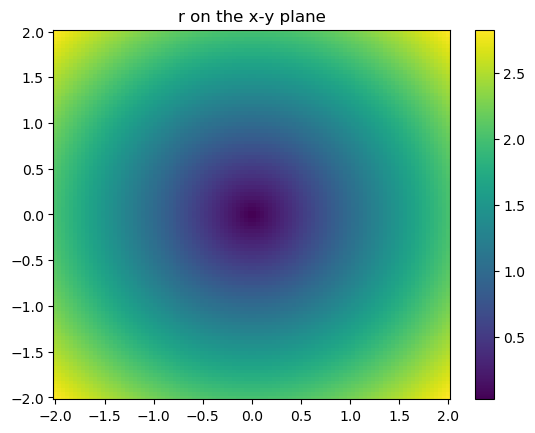

In [178]:
plt.pcolormesh(xx,yy,r)
plt.colorbar()
plt.title("r on the x-y plane")

Text(0.5, 1.0, 'φ on the x-y plane')

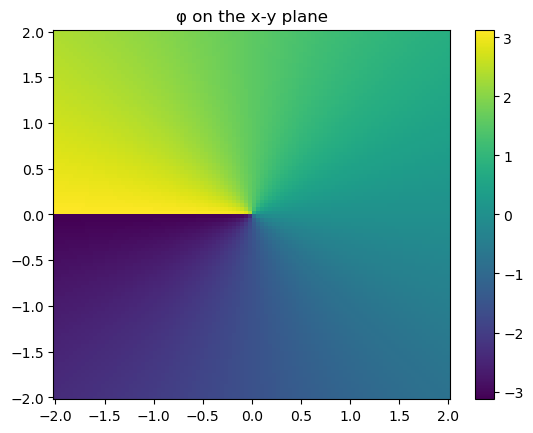

In [179]:
plt.pcolormesh(xx,yy,phi)
plt.colorbar()
plt.title("φ on the x-y plane")

### 1.5 Calculation

Text(0.5, 1.0, 'Function f(r,φ) on the x-y plane')

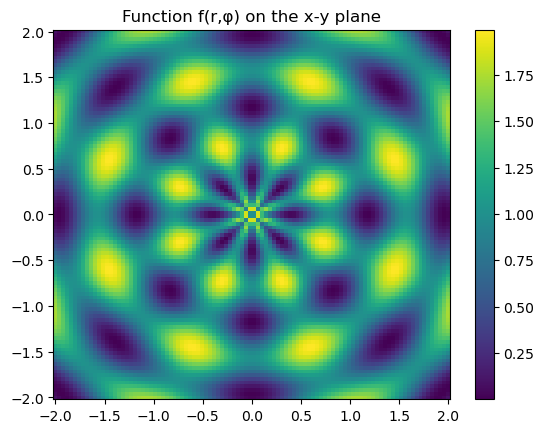

In [180]:
f = np.power(np.cos(4*r),2) + np.power(np.sin(4*phi),2)
plt.pcolormesh(xx,yy,f)
plt.colorbar()
plt.title('Function f(r,φ) on the x-y plane')

### 1.6 Plot the mean of f with respect to the x axis as a function of y

Text(0, 0.5, 'y-values')

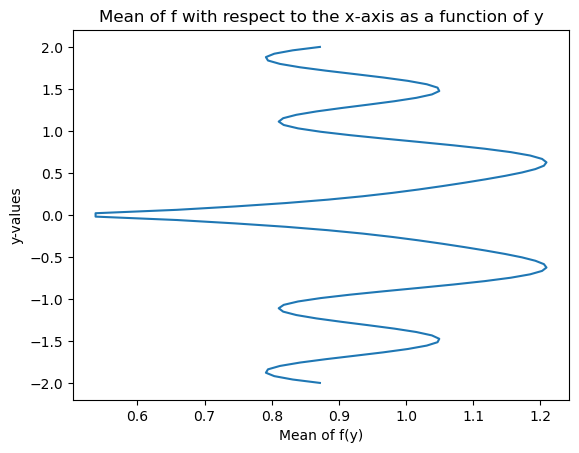

In [212]:
f_y = f.mean(axis = 0)
plt.plot(f_y, y)
plt.title('Mean of f with respect to the x-axis as a function of y')
plt.xlabel('Mean of f(y)')
plt.ylabel('y-values')

### 1.7 Plot the mean of f with respect to the y axis as a function of x

Text(0, 0.5, 'Mean of f(x)')

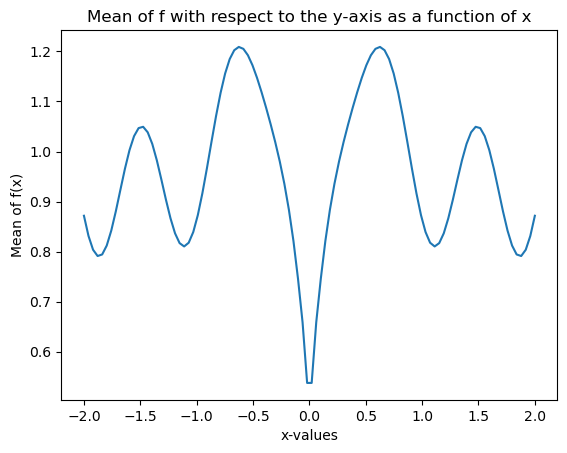

In [213]:
f_x = f.mean(axis = 1)
plt.plot(x, f_x)
plt.title('Mean of f with respect to the y-axis as a function of x')
plt.xlabel('x-values')
plt.ylabel('Mean of f(x)')

### Part 2: Analyze ARGO Data

#### 2.1 Load each data file as a numpy array

In [98]:
T = np.load('/data9/UN3400/work/yc4406/float_data/T.npy')
S = np.load('/data9/UN3400/work/yc4406/float_data/S.npy')
P = np.load('/data9/UN3400/work/yc4406/float_data/P.npy')
date = np.load('/data9/UN3400/work/yc4406/float_data/date.npy')
lat = np.load('/data9/UN3400/work/yc4406/float_data/lat.npy')
lon = np.load('/data9/UN3400/work/yc4406/float_data/lon.npy')
level = np.load('/data9/UN3400/work/yc4406/float_data/levels.npy')

#### 2.2 Examine the shapes of T, S and P compared to lon, lat, date and level

In [99]:
print("The shape of temperature array is", T.shape, "\n")
print("The shape of salinity array is", S.shape, "\n")
print("The shape of pressure array is", P.shape, "\n")
print("The shape of longitude array is", lon.shape, "\n")
print("The shape of latitude array is", lat.shape, "\n")
print("The shape of date array is", date.shape, "\n")
print("The shape of level array is", level.shape, "\n")

The shape of temperature array is (78, 75) 

The shape of salinity array is (78, 75) 

The shape of pressure array is (78, 75) 

The shape of longitude array is (75,) 

The shape of latitude array is (75,) 

The shape of date array is (75,) 

The shape of level array is (78,) 



In [233]:
print("The level array is shared between T, S, and P because they all have 78 entries.", "\n", "This means each sample has 78 depth levels, without accounting for missing data.")
print("T, S, and P data are sampled across 75 dates.", "\n", "Each sampling date creates a pair of latitude-longitude coordinates.")

The level array is shared between T, S, and P because they all have 78 entries. 
 This means each sample has 78 depth levels, without accounting for missing data.
T, S, and P data are sampled across 75 dates. 
 Each sampling date creates a pair of latitude-longitude coordinates.


### 2.3 Make a plot for each column of data in T, S, and P

Text(0, 0.5, 'Depth (m)')

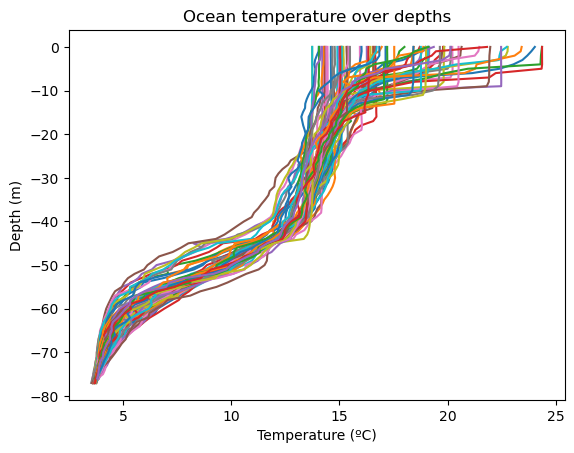

In [128]:
depth = -level
plt.plot(T,depth)
plt.title('Ocean temperature over depths')
plt.xlabel('Temperature (ºC)')
plt.ylabel('Depth (m)')

Text(0, 0.5, 'Depth (m)')

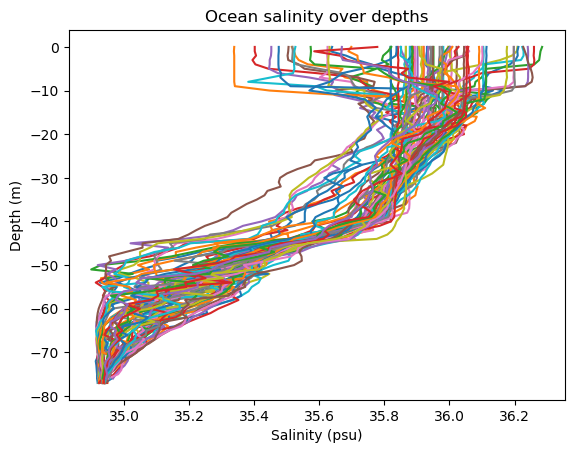

In [154]:
plt.plot(S,depth)
plt.title('Ocean salinity over depths')
plt.xlabel('Salinity (psu)')
plt.ylabel('Depth (m)')

Text(0, 0.5, 'Depth below sea level (m)')

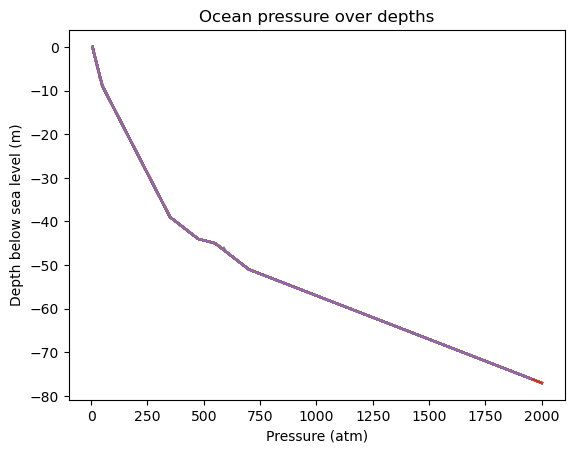

In [152]:
plt.plot(P,depth)
plt.title('Ocean pressure over depths')
plt.xlabel('Pressure (atm)')
plt.ylabel('Depth below sea level (m)')

### 2.4 Compute the mean and standard deviation of each of T, S and P at each depth in level.

In [219]:
T_mean_nan = np.mean(T, axis=1)
T_sd_nan = np.std(T, axis=1)

S_mean_nan = np.mean(S, axis=1)
S_sd_nan = np.std(S, axis=1)

P_mean_nan = np.mean(P, axis=1)
P_sd_nan = np.std(P, axis=1)

print(T_mean_nan, T_sd_nan, S_mean_nan, S_sd_nan, P_mean_nan, P_sd_nan)

[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan 10.80430666 10.49702667
 10.1749066   9.83453334  9.48625332  9.19793334  8.66010666  8.12324001
  7.60221333  7.15289333  6.74250667  6.39543999  6.04598667  5.74538665
  5.48913333  5.26604001  5.08768     4.93479998  4.77769334  4.65368
  4.54237334  4.44274664  4.35933333         nan         nan         nan
         nan         nan         nan         nan         nan         nan] [       nan        nan        nan        nan        n

### 2.5 Now make three similar plot, but show only the mean T, S and P at each depth. Show error bars on each plot using the standard deviations.

Text(0, 0.5, 'Depth below surface ocean(m)')

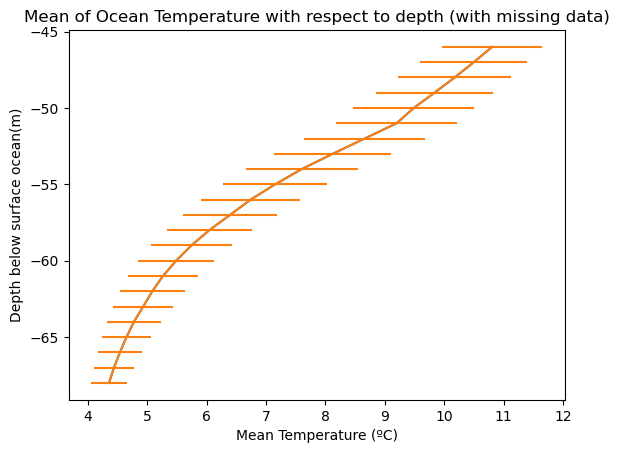

In [226]:
plt.plot(T_mean_nan, -level)
plt.errorbar(T_mean_nan, -level, xerr=T_sd_nan)
plt.title('Mean of Ocean Temperature with respect to depth (with missing data)')
plt.xlabel('Mean Temperature (ºC)')
plt.ylabel('Depth below surface ocean(m)')

Text(0, 0.5, 'Depth below surface ocean(m)')

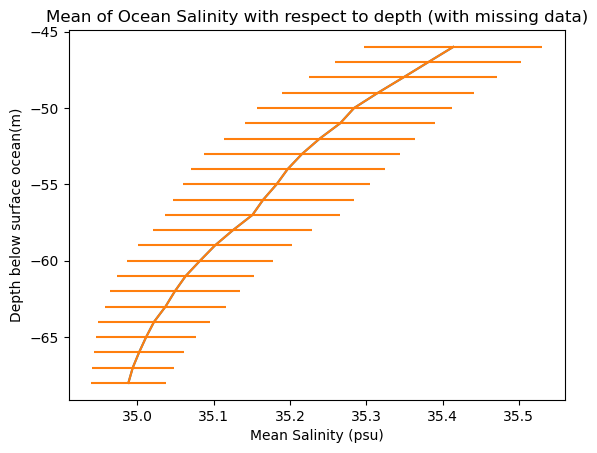

In [224]:
plt.plot(S_mean_nan, -level)
plt.errorbar(S_mean_nan, -level, xerr=S_sd_nan)
plt.title('Mean of Ocean Salinity with respect to depth (with missing data)')
plt.xlabel('Mean Salinity (psu)')
plt.ylabel('Depth below surface ocean(m)')

Text(0, 0.5, 'Depth below surface ocean(m)')

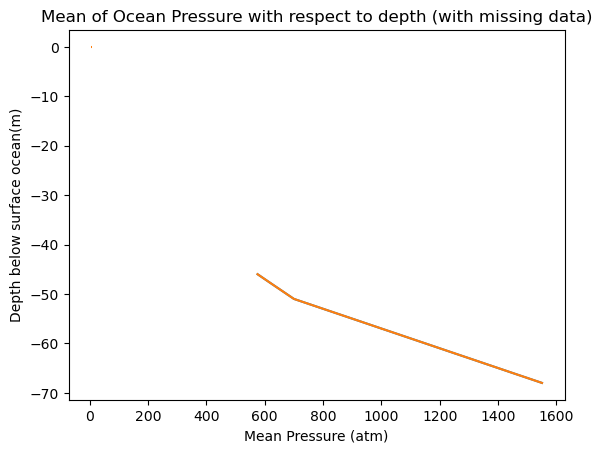

In [225]:
plt.plot(P_mean_nan, -level)
plt.errorbar(P_mean_nan, -level, xerr=P_sd_nan)
plt.title('Mean of Ocean Pressure with respect to depth (with missing data)')
plt.xlabel('Mean Pressure (atm)')
plt.ylabel('Depth below surface ocean(m)')

### 2.6 Account For Missing Data

Text(0, 0.5, 'Depth below surface ocean(m)')

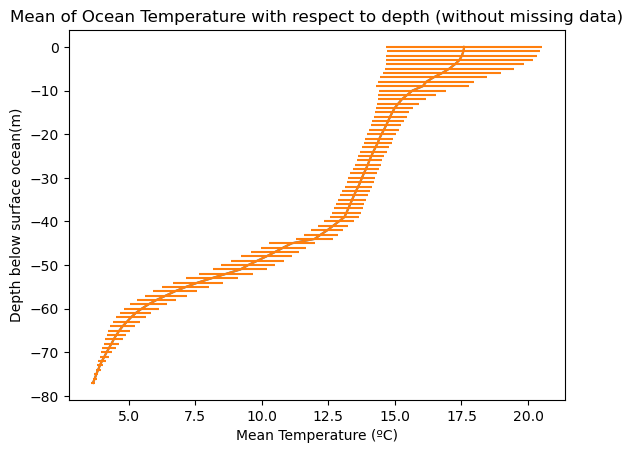

In [234]:
T_mean = np.nanmean(T, axis=1)
T_sd = np.nanstd(T, axis=1)
plt.plot(T_mean, -level)
plt.errorbar(T_mean, -level, xerr=T_sd)

plt.title('Mean of Ocean Temperature with respect to depth (without missing data)')
plt.xlabel('Mean Temperature (ºC)')
plt.ylabel('Depth below surface ocean(m)')

Text(0, 0.5, 'Depth below surface ocean(m)')

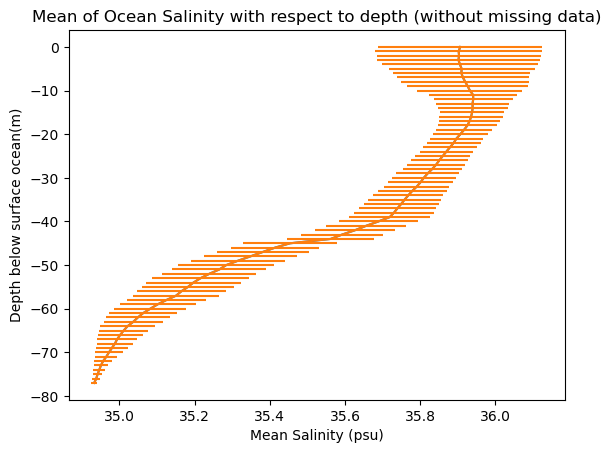

In [235]:
S_mean = np.nanmean(S, axis=1)
S_sd = np.nanstd(S, axis=1)
plt.plot(S_mean, -level)
plt.errorbar(S_mean, -level, xerr=S_sd)

plt.title('Mean of Ocean Salinity with respect to depth (without missing data)')
plt.xlabel('Mean Salinity (psu)')
plt.ylabel('Depth below surface ocean(m)')

Text(0, 0.5, 'Depth below surface ocean(m)')

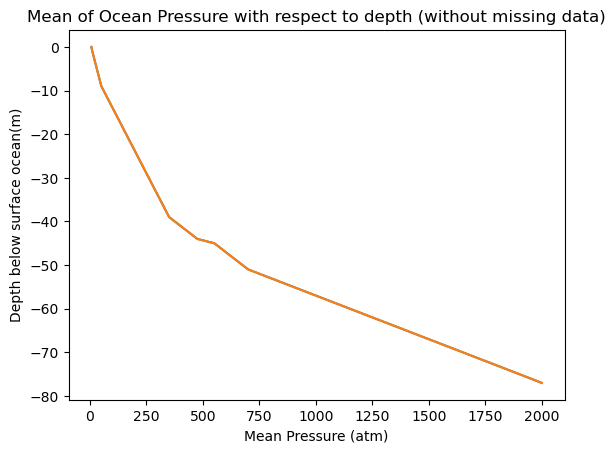

In [236]:
P_mean = np.nanmean(P, axis=1)
P_sd = np.nanstd(P, axis=1)
plt.plot(P_mean, -level)
plt.errorbar(P_mean, -level, xerr=P_sd)

plt.title('Mean of Ocean Pressure with respect to depth (without missing data)')
plt.xlabel('Mean Pressure (atm)')
plt.ylabel('Depth below surface ocean(m)')

### 2.7 Create a scatter plot of the lon, lat positions of the ARGO float.

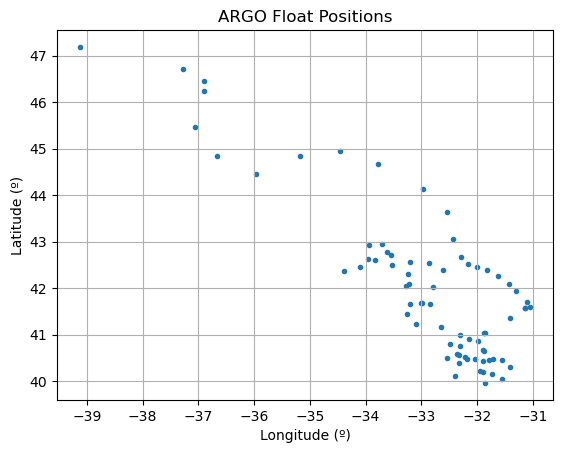

In [203]:
plt.scatter(lon,lat, marker=".")
plt.title('ARGO Float Positions')
plt.xlabel('Longitude (º)')
plt.ylabel('Latitude (º)')
plt.grid()